In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the dataset
df = pd.read_csv('Advertising.csv')  # Replace with the correct path to the dataset
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# 1. EDA (Exploratory Data Analysis)

In [7]:
# Checking the structure of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# Check for missing values
print(df.isnull().sum())

ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


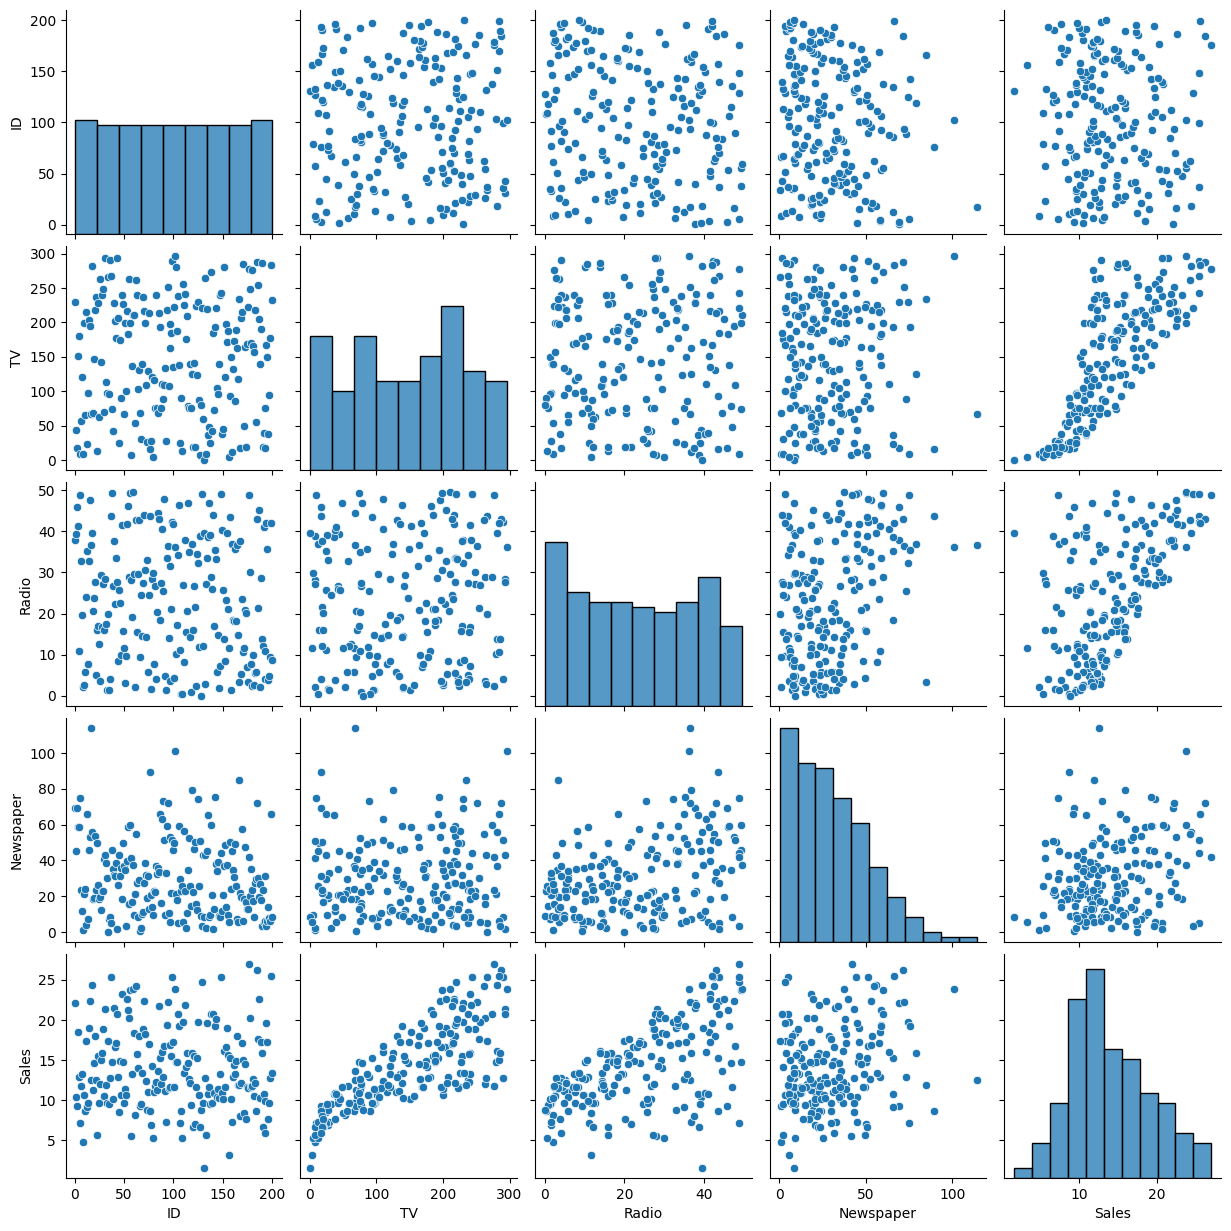

In [9]:
# Plotting pairplots to see relationships between variables
sns.pairplot(df)
plt.show()

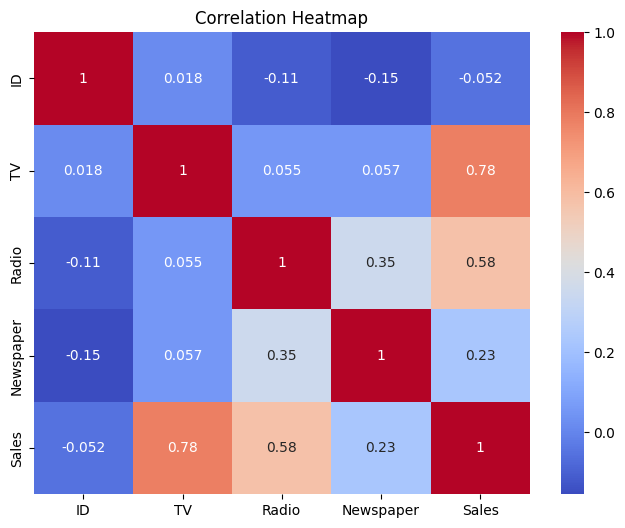

In [10]:
# Correlation heatmap to see which features are strongly related to Sales
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Linear Regression: Predicting Sales based on TV advertising spend

In [11]:
# Defining feature (TV) and target (Sales)
X = df[['TV']]  # Feature (TV advertising spend)
y = df['Sales']  # Target (Sales)

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values for the test set
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
# Print performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 10.20
R² Score: 0.68


# 3. Visualization: Plot the regression line with the data points

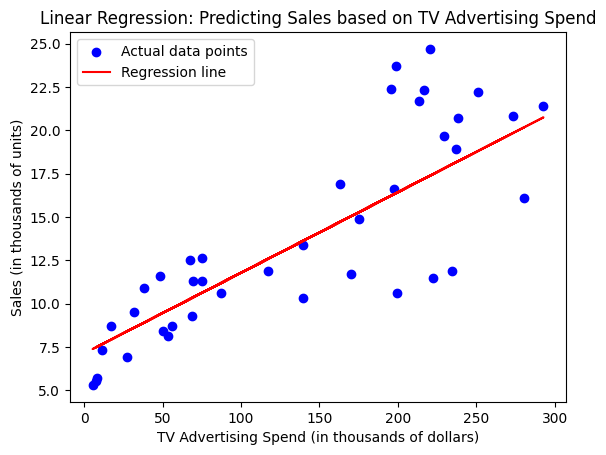

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Actual data points')  # Test data points
plt.plot(X_test, y_pred, color='red', label='Regression line')  # Regression line
plt.title('Linear Regression: Predicting Sales based on TV Advertising Spend')
plt.xlabel('TV Advertising Spend (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.legend()
plt.show()